<a href="https://colab.research.google.com/github/kushal2022/Pytorch/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basic PyTorch

In [ ]:
import torch

weights = torch.tensor([0.2126, 0.7152, 0.0722], requires_grad=True)

for epoch in range(10):
  model_output = (weights * 3).sum()

  model_output.backward()

  print(weights.grad)

  weights.grad.zero_()

tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])


In [ ]:
weights = torch.tensor([0.2126, 0.7152, 0.0722], requires_grad=True)

# Wrap the weights tensor in a list to make it an iterable
optimizer = torch.optim.SGD([weights], lr=0.01)

for epoch in range(10):
  model_output = (weights * 3).sum()

  model_output.backward()

  print(weights.grad)

  optimizer.step()

  optimizer.zero_grad()

tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])


**Back propagation example with pytorch**

In [ ]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

# forward pass and compute the loss
y_hat = w * x
loss = (y_hat - y)**2

print(loss)

# backward pass
loss.backward()
print(w.grad)

### update weights
### next forward and backward

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


1. Load MNIST data through DataLoader, Transformation
2. Multilayer Neural Net, activation function
3. Loss & Optimizer
4. Traning Loop
5. Model Evaluation
6. GPU Support

torch.Size([100, 1, 28, 28]) torch.Size([100])


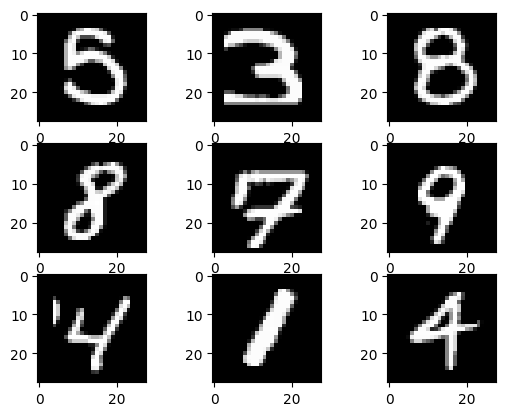

In [7]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
input_size = 784 # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# Import the data MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [8]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [10]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [12]:
# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # 100, 1, 28, 28
    # 100, 784
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if(i % 100 == 0):
      print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

  # testing and evaluation
  with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
      images = images.reshape(-1, 28*28).to(device)
      labels = labels.to(device)
      outputs = model(images)

      # value, index
      _, predictions = torch.max(outputs, 1)
      n_samples += labels.shape[0]
      n_correct += (predictions == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc}')

epoch 1 / 2, step 1/600, loss = 0.1142
epoch 1 / 2, step 101/600, loss = 0.0907
epoch 1 / 2, step 201/600, loss = 0.1660
epoch 1 / 2, step 301/600, loss = 0.1032
epoch 1 / 2, step 401/600, loss = 0.0567
epoch 1 / 2, step 501/600, loss = 0.0890
accuracy = 97.42
epoch 2 / 2, step 1/600, loss = 0.0378
epoch 2 / 2, step 101/600, loss = 0.0371
epoch 2 / 2, step 201/600, loss = 0.0355
epoch 2 / 2, step 301/600, loss = 0.0469
epoch 2 / 2, step 401/600, loss = 0.0315
epoch 2 / 2, step 501/600, loss = 0.0174
accuracy = 97.8
